<a href="https://colab.research.google.com/github/AbhishekDaniel1411/IBM_Data_Science_Professional_Certificate/blob/main/Data_Visualization_with_python/Wildfires_in_Australia/Analysing_wildfire_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

%matplotlib inline

## Overview on the dataset


This wildfire dataset contains data on fire activities in Australia starting from 2005.

**Variables:**

1. **Region**: the 7 regions

2. **Date**: in UTC and provide the data for 24 hours ahead

3. **Estimated_fire_area**: daily sum of estimated fire area for presumed vegetation fires with a confidence $>75\%$ for a each region in km${}^2$

4. **Mean_estimated_fire_brightness**: daily mean (by flagged fire pixels(=count)) of estimated fire brightness for presumed vegetation fires with a confidence level $>75\%$ in Kelvin

5. **Mean_estimated_fire_radiative_power**: daily mean of estimated radiative power for presumed vegetation fires with a confidence level $>75\%$ for a given region in megawatts

6. **Mean_confidence**: daily mean of confidence for presumed vegetation fires with a confidence level $75\%$

7. **Std_confidence**: standard deviation of estimated fire radiative power in megawatts

8. **Var_confidence**: Variance of estimated fire radiative power in megawatts

9. **Count**: daily numbers of pixels for presumed vegetation fires with a confidence level of larger than $75\%$ for a given region

10. **Replaced**: Indicates with an Y whether the data has been replaced with standard quality data when they are available (usually with a 2-3 month lag). Replaced data has a slightly higher quality in terms of locations

## Importing Data

In [5]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"

df = pd.read_csv(url)

In [6]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [7]:
df.shape

(26406, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26406 entries, 0 to 26405
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               26406 non-null  object 
 1   Date                                 26406 non-null  object 
 2   Estimated_fire_area                  26406 non-null  float64
 3   Mean_estimated_fire_brightness       26406 non-null  float64
 4   Mean_estimated_fire_radiative_power  26406 non-null  float64
 5   Mean_confidence                      26406 non-null  float64
 6   Std_confidence                       24199 non-null  float64
 7   Var_confidence                       24199 non-null  float64
 8   Count                                26406 non-null  int64  
 9   Replaced                             26406 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 2.0+ MB


Let's change the format of <code>'Date'</code> from object to datetime. Also we'll add 2 columns called <code>'Year'</code> and <code>'Month'</code> to the dataframe.

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
import datetime as dt

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,NSW,2005-01-04,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,2005-01-05,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,2005-01-06,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1
3,NSW,2005-01-07,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1
4,NSW,2005-01-08,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1


Let's try to understand the change in average estimated fire area over time

In [11]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'Year', 'Month'],
      dtype='object')

In [12]:
df_new = df.groupby('Year')['Estimated_fire_area'].mean()
df_new = pd.DataFrame({'Year': df_new.index, 'Average_estimated_fire_area': df_new.values})
#df_new.reset_index(inplace = True)
#df_new.rename(columns = {'Estimated_fire_area': 'Average_estimated_fire_area'}, inplace = True)

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         16 non-null     int32  
 1   Average_estimated_fire_area  16 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 324.0 bytes


## Visualizing our Data

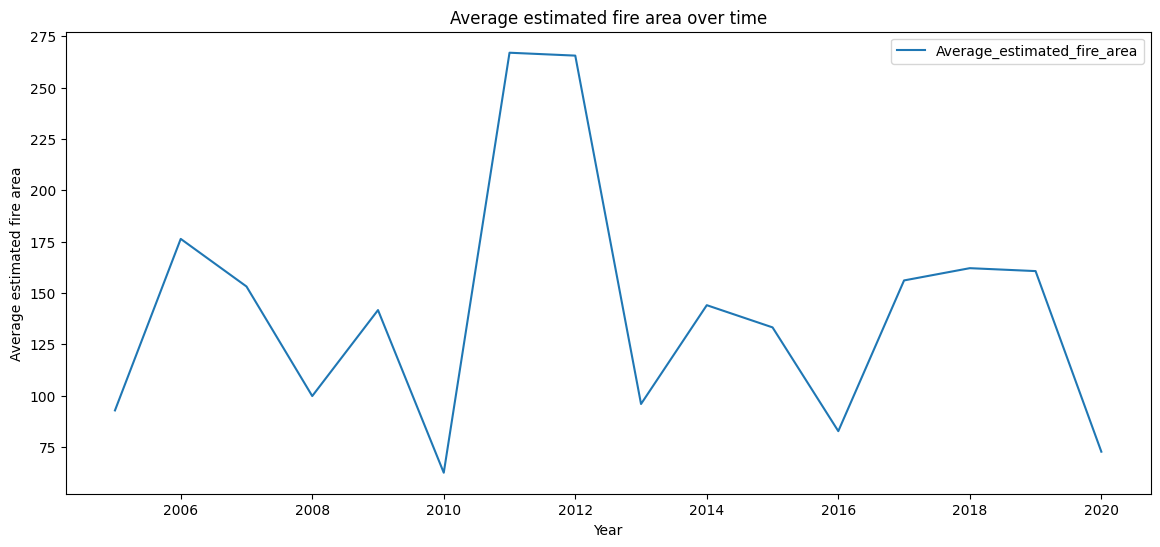

In [13]:
fig, ax1 = plt.subplots(figsize=(14,6))
df_new.plot(x = 'Year', y = 'Average_estimated_fire_area', ax = ax1)
plt.title('Average estimated fire area over time')
plt.xlabel('Year')
plt.ylabel('Average estimated fire area')
plt.show()

Notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.

In [14]:
df2 = df.groupby(['Year', 'Month'])['Estimated_fire_area'].mean()
#df2 = df2.loc[2010:2013] if you want to look only for that time period

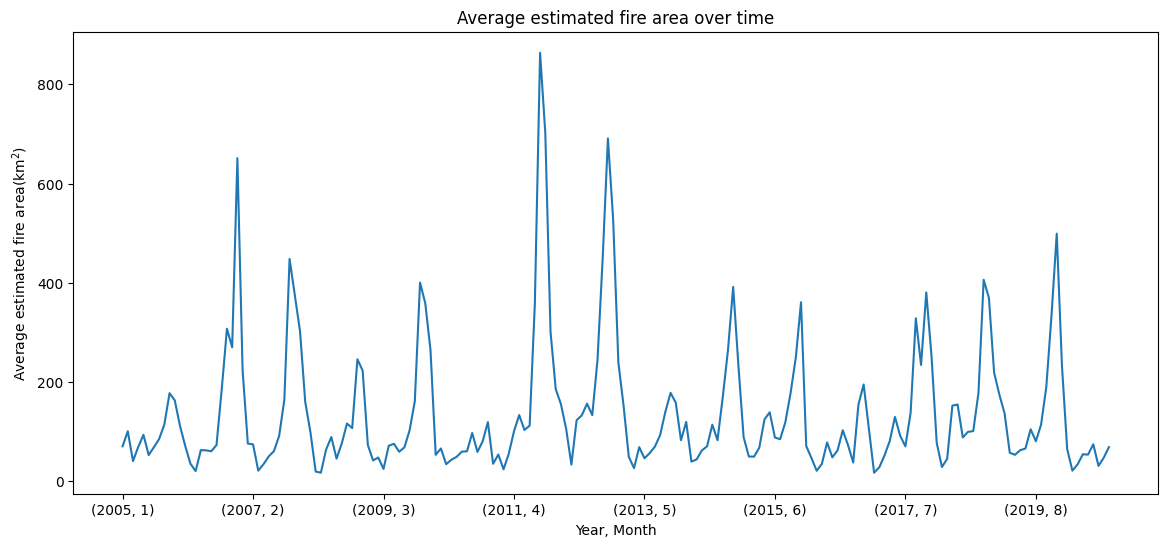

In [15]:
fig, ax2 = plt.subplots(figsize=(14,6))
df2.plot(x = df2.index, y = df2.values, ax = ax2)
plt.title('Average estimated fire area over time')
plt.xlabel('Year, Month')
plt.ylabel('Average estimated fire area(km${}^2$)')
plt.show()

This plot represents that the estimated fire area was on its peak after 2011, April and before 2012. You can verify on google/news, this was the time of maximum wildfire hit in Austrailia

Let's have an insight on the distribution of mean estimated fire brightness across the regions

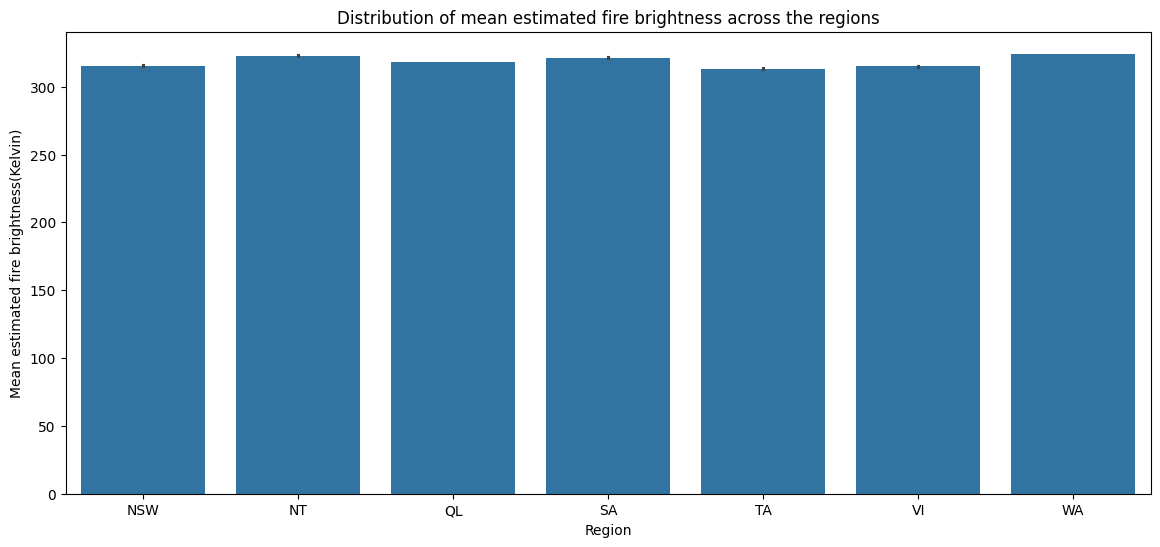

In [16]:
fig, bar_ax = plt.subplots(figsize=(14,6))
sns.barplot(x = df['Region'], y = df['Mean_estimated_fire_brightness'])
plt.title('Distribution of mean estimated fire brightness across the regions')
plt.xlabel('Region')
plt.ylabel('Mean estimated fire brightness(Kelvin)')
plt.show()

Let's find the portion of count of pixels for presumed vegetation fires vary across regions.

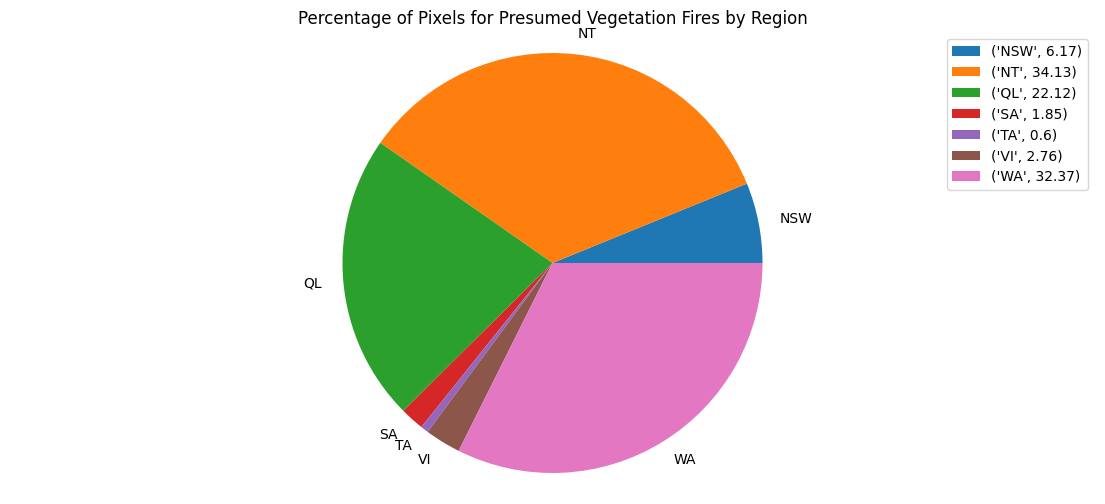

In [17]:
plt.figure(figsize=(14, 6))
region_counts = df.groupby('Region')['Count'].sum()
plt.pie(region_counts, labels=region_counts.index)
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.legend([(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)])
plt.axis('equal')
plt.show()

Let's try to develop a histogram of the mean estimated fire brightness
using Matplotlib to create the histogram

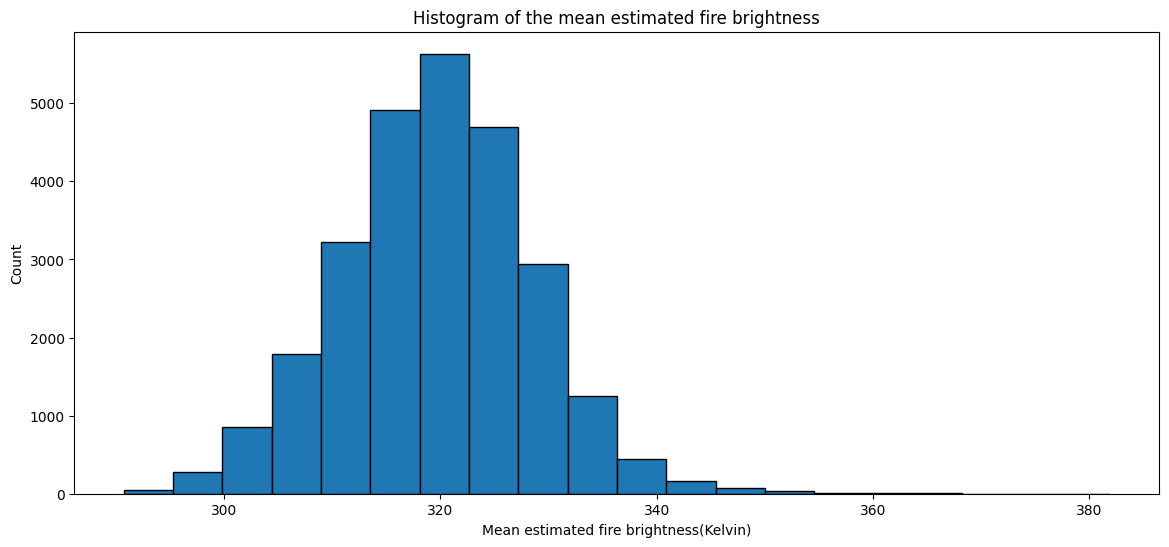

In [18]:
plt.figure(figsize=(14, 6))
plt.hist(x = df['Mean_estimated_fire_brightness'], edgecolor = 'black', bins = 20)
plt.title('Histogram of the mean estimated fire brightness')
plt.xlabel('Mean estimated fire brightness(Kelvin)')
plt.ylabel('Count')
plt.show()

What if we need to understand the distribution of estimated fire brightness across regions? Let's use the functionality of seaborn and pass region as hue.

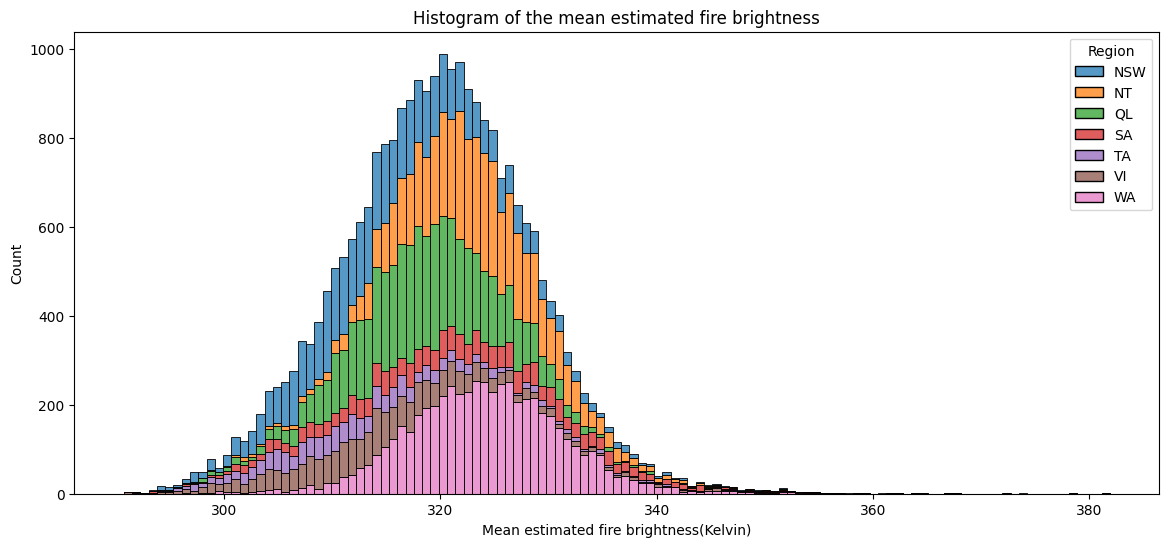

In [19]:
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')
plt.title('Histogram of the mean estimated fire brightness')
plt.xlabel('Mean estimated fire brightness(Kelvin)')
plt.ylabel('Count')
plt.show()

Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level

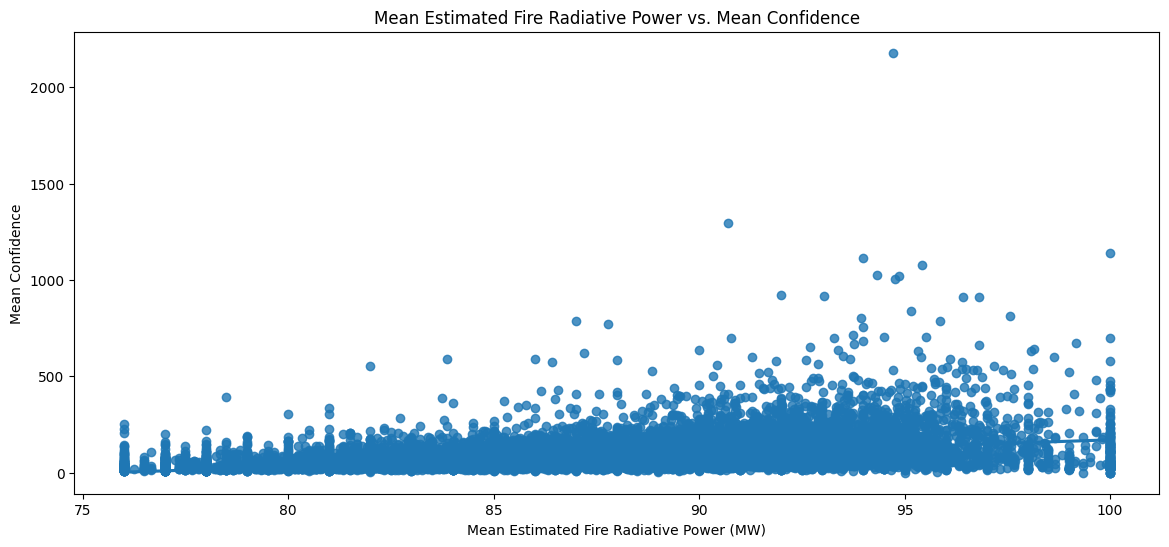

In [20]:
plt.figure(figsize=(14, 6))
sns.regplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()

In [21]:
df['Mean_estimated_fire_radiative_power'].corr(df['Mean_confidence'], method = 'pearson')

0.45232189159864267

Mean estimated fire radiative power has moderately positive correlation with Mean_confidence with pearson coefficient equals to 0.4523(approximately)

In [22]:
Aus_map = folium.Map(location = [-25, 135], zoom_start = 4)

region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'],
               'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411],
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)


aus_reg = folium.map.FeatureGroup()

for lat, lon, region in zip(reg.Lat, reg.Lon, reg.region):
  aus_reg.add_child(
      folium.features.CircleMarker(
          [lat, lon],
          popup = region,
          radius = 5,
          color = 'red',
          fill = True,
          fill_color = 'blue',
          fill_opacity = 0.5
      )
  )

Aus_map.add_child(aus_reg)